# <en><center>Data Grouping</center></en>

## Table of Contents

- [Basic Grouping Syntax](#Basic-Grouping-Syntax)
- [Intelligent Imputation](#Intelligent-Imputation)
- [Grouping Aggregation](#Grouping-Aggregation)
- [Summary](#Summary)

## Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

## Basic Grouping Syntax

### Dataset

In [5]:
train_dataset = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Pandas Bootcamp\\P87-Section-5-Grouping-Resources\\train.csv"

In [6]:
df = pd.read_csv(train_dataset, low_memory = False, parse_dates = ["Date"])
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Normally, Pandas does not need to load all the data into memory at one time.
It usually breaks up the data into chunks as needed.

The datatype is shifting in this dataframe. 
- On this case, it is necessary to load in all the data at one time in order to determine
    what exactly the datatypes should be to have better accuracy. 
    
- To load the entire dataset at one time, we need to pass in the argument: "low_memory = False".

What now you see here is that the date column has the object datatype.

- To change the datatype of the dates column we can pass in the argument: "parse_dates = ["Date"]""

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


This is a reference for everything you can do with the groupby object: __[Groupby Reference](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html)__

In [8]:
dfg = df.groupby("Store")
dfg

In [9]:
dfg.mean()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590
...,...,...,...,...,...,...
1111,3.997877,4342.968153,373.548832,0.826964,0.382166,0.180467
1112,3.997877,8465.280255,693.498938,0.826964,0.382166,0.180467
1113,3.997877,5516.180467,596.763270,0.832272,0.382166,0.168790


In [11]:
store_avg = dfg.mean()
store_avg.head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590


In [16]:
store_avg = store_avg.reset_index()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


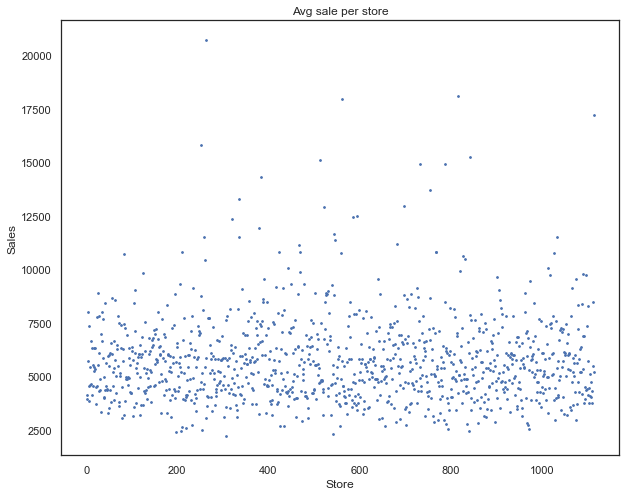

In [19]:
store_avg.plot.scatter("Store","Sales", s = 3, title = "Avg sale per store");

In [14]:
sns.scatterplot(data = store_avg, x = "Store", "Sales")

SyntaxError: positional argument follows keyword argument (369568045.py, line 1)

### Multiple Groups

In [20]:
store_day = df.groupby(["Store", "DayOfWeek"], as_index= False).mean()
store_day.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,1,4946.119403,567.768657,0.955224,0.537313,0.223881
1,1,2,4650.918519,545.370370,0.992593,0.533333,0.229630
2,1,3,4454.474074,530.407407,0.977778,0.533333,0.229630
3,1,4,4094.607407,493.407407,0.918519,0.533333,0.222222
4,1,5,4516.414815,537.259259,0.955556,0.533333,0.229630


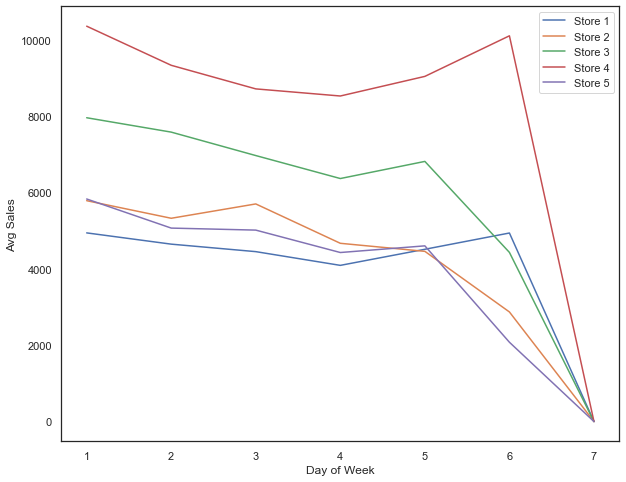

In [23]:
for store in df.Store.unique()[:5]:
    df_tmp = store_day[store_day.Store == store]
    plt.plot(df_tmp.DayOfWeek, df_tmp.Sales, label = f"Store {store}")
plt.xlabel("Day of Week")
plt.ylabel("Avg Sales")
plt.legend();

In [22]:
df["Store"].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

### Continuous Grouping

In [24]:
df.groupby("Sales").mean().shape

(21734, 6)

We have 21734 rows which might represent 21734 unique values for sales.
 - This is not what we want for a continuous group
 - We want to cut the sales into different bands
     - For example: Zero to 2000, 2000 to 4000, 4000 to 6000 etc.
         - Pandas has a function to do this called "cut"

In [25]:
df.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [27]:
bins = [0, 2000, 4000, 6000, 8000, 10000, 50000]

In [28]:
cuts = pd.cut(df.Sales, bins, include_lowest = True)
df["SalesGroup"] = cuts
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesGroup
0,1,5,2015-07-31,5263,555,1,1,0,1,"(4000.0, 6000.0]"
1,2,5,2015-07-31,6064,625,1,1,0,1,"(6000.0, 8000.0]"
2,3,5,2015-07-31,8314,821,1,1,0,1,"(8000.0, 10000.0]"
3,4,5,2015-07-31,13995,1498,1,1,0,1,"(10000.0, 50000.0]"
4,5,5,2015-07-31,4822,559,1,1,0,1,"(4000.0, 6000.0]"


In [31]:
df.groupby(["Store", "SalesGroup"]).DayOfWeek.value_counts()

Store  SalesGroup          DayOfWeek
1      (-0.001, 2000.0]    7            134
                           4             11
                           1              6
                           5              6
                           3              3
                                       ... 
1115   (10000.0, 50000.0]  5              7
                           2              2
                           4              2
                           6              2
                           3              1
Name: DayOfWeek, Length: 33024, dtype: int64

In [32]:
df.groupby(["Store", "SalesGroup"]).DayOfWeek.value_counts().unstack(fill_value = 0)

DayOfWeek                  1   2   3   4   5    6    7
Store SalesGroup                                      
1     (-0.001, 2000.0]     6   1   3  11   6    0  134
      (2000.0, 4000.0]    28  42  42  43  28   13    0
      (4000.0, 6000.0]    70  80  83  72  91  109    0
      (6000.0, 8000.0]    26  12   7   9   9   10    0
      (8000.0, 10000.0]    4   0   0   0   1    2    0
...                       ..  ..  ..  ..  ..  ...  ...
1115  (2000.0, 4000.0]    15  17  15   9   0    0    0
      (4000.0, 6000.0]    34  54  65  64  61   36    0
      (6000.0, 8000.0]    30  52  39  39  50   80    0
      (8000.0, 10000.0]   37   9  12  10  11   16    0
      (10000.0, 50000.0]  12   2   1   2   7    2    0

[6263 rows x 7 columns]

In [34]:
df.groupby(["Store", "SalesGroup", "DayOfWeek"]).Sales.count()

Store  SalesGroup          DayOfWeek
1      (-0.001, 2000.0]    1             6
                           2             1
                           3             3
                           4            11
                           5             6
                                        ..
1115   (10000.0, 50000.0]  3             1
                           4             2
                           5             7
                           6             2
                           7             0
Name: Sales, Length: 46830, dtype: int64

### Key Take Aways

We can also use crosstab and pivot table for these kinds of groupings.

- groupby
- reset_index
- cut
- unstack


## Intelligent Imputation

### Dataset 

In [37]:
train_dataset = "C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\\
Python\\Bootcamps\\Pandas Bootcamp\\P87-Section-5-Grouping-Resources\\train.csv"

In [39]:
dfo = pd.read_csv(train_dataset, low_memory = False, parse_dates = ["Date"])
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Grouping - Imputation 

- Basically its filling in missing values
- This is not filling in missing data in a group by
- It is using group by to more intelligently fill in missing data.

Lets say that a computation malfunction had corrupted 10% of our sales data, and set it to NaN.

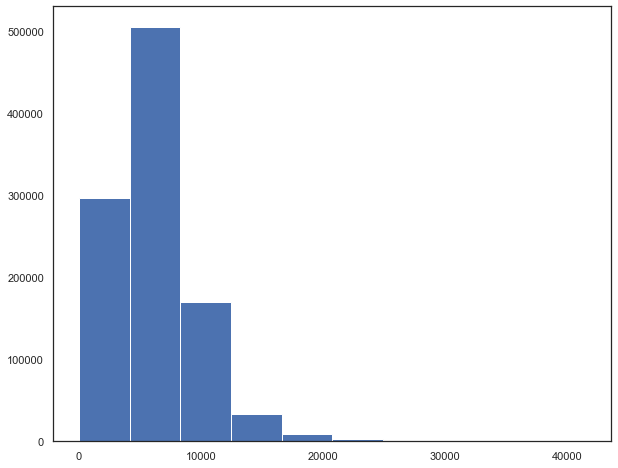

In [40]:
plt.hist(dfo.Sales);

(844392, 9)


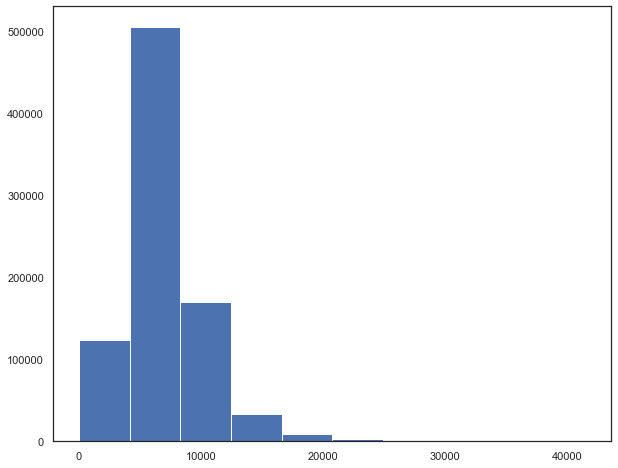

In [41]:
df = dfo[dfo.Open == 1].copy()
plt.hist(df.Sales)
print(df.shape);

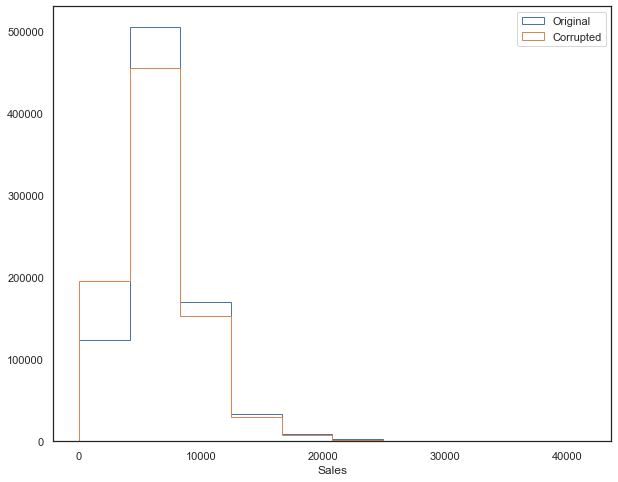

In [44]:
mask = np.random.choice(10, size = df.shape[0]) == 0
df["NewSales"] = df.Sales.copy()
df.loc[mask, "NewSales"] = np.nan

plt.hist(df.Sales, label = "Original", histtype = "step")
plt.hist(df.NewSales.fillna(0), label = "Corrupted", histtype = "step")
plt.legend(), plt.xlabel("Sales");

We will just fill with the mean and use the transform function.
 - Transform is similar to apply, but has to return a series the same size as the input.

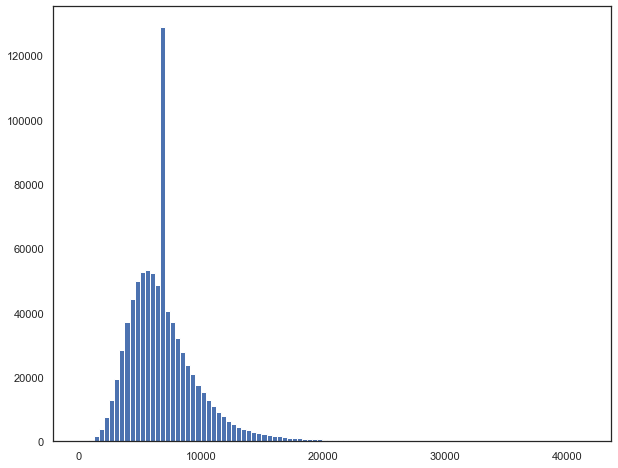

In [45]:
test_fix = df.NewSales.transform(lambda x: x.fillna(x.mean()))
plt.hist(test_fix, bins = 100);

 - Based on previous examples, We know that some stores are doing far better than others. 
 - Sales vary significantly over the course of the week
 - Perhaps its good enough if we take those two factors into consideration. 

In [46]:
dfg = df.groupby(["Store", "DayOfWeek"])
dfg.median().head

<bound method NDFrame.head of                   Sales  Customers  Open  Promo  SchoolHoliday  NewSales
Store DayOfWeek                                                         
1     1          5302.5      581.0   1.0    1.0            0.0    5280.0
      2          4640.5      549.5   1.0    1.0            0.0    4806.0
      3          4549.5      533.0   1.0    1.0            0.0    4470.5
      4          4380.0      525.0   1.0    1.0            0.0    4366.0
      5          4651.0      552.0   1.0    1.0            0.0    4649.0
...                 ...        ...   ...    ...            ...       ...
1115  2          5870.5      405.0   1.0    1.0            0.0    5687.0
      3          5653.0      390.0   1.0    1.0            0.0    5663.0
      4          5666.5      397.0   1.0    1.0            0.0    5650.0
      5          6107.0      438.0   1.0    1.0            0.0    6104.0
      6          6609.5      480.0   1.0    0.0            0.0    6603.0

[6723 rows x 6 colum

We will use Transform again, but this time on the group. 
- Unlike the apply or similar functions, Transform requires that the output size be the same as the input.
- Therefor, we can't condense down our numbers. 
- You can think of it like aggregating to get a single number, but then backfilling it according to the correct group.

not the * is the splat operator its just to prevent you from having to rewrite the same code over again. 
- It unpacks the dictionary opts

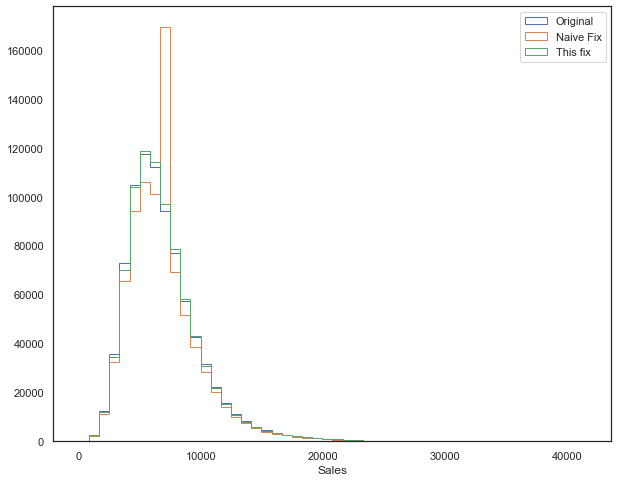

In [48]:
test_fix2 = dfg.NewSales.transform(lambda x: x.fillna(x.mean()))

opts = {"histtype": "step", "bins":50}
plt.hist(df.Sales, label = "Original", **opts)
plt.hist(test_fix, label = "Naive Fix", **opts)
plt.hist(test_fix2, label = "This fix", **opts)
plt.legend(), plt.xlabel("Sales");

We could improve this analysis even further.

- Sales is a skewed distribution. Better to use the median than the mean.
- Sales performance of the previous days, both above and below the mean, might prove to be a good indicator for true performance.
- This is leading into machine learning. 

### Summary

- Use known relationships and group by to do more intelligent imputation
- transformation is new

__[Apply vs Transform on a group object](https://stackoverflow.com/questions/27517425/apply-vs-transform-on-a-group-object)__

## Grouping Aggregation

### Single Aggregates

In [7]:
df.groupby("Store").mean().head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590


Full list of aggregations: mean, std, max, min, sum, median, etc

- __[Aggregation List](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html)__

### Different Aggregates for Different Columns

- We use the agg function (altenatively we can also use the aggregate function)
- pass in a dictionary into the agg function

In [8]:
df.groupby(["Store","DayOfWeek"]).agg({"Sales": "mean", "Customers":"count"})

Sales  Customers
Store DayOfWeek                        
1     1          4946.119403        134
      2          4650.918519        135
      3          4454.474074        135
      4          4094.607407        135
      5          4516.414815        135
...                      ...        ...
1115  3          5666.155556        135
      4          5396.607407        135
      5          6208.881481        135
      6          6773.388060        134
      7             0.000000        134

[7805 rows x 2 columns]

In [11]:
df.groupby(["Store","DayOfWeek"]).agg({"Sales": ["mean", "max","min"], "Customers":"count"})


Sales              Customers
                        mean    max   min     count
Store DayOfWeek                                    
1     1          4946.119403   9528     0       134
      2          4650.918519   7959     0       135
      3          4454.474074   7821     0       135
      4          4094.607407   7785     0       135
      5          4516.414815   8414     0       135
...                      ...    ...   ...       ...
1115  3          5666.155556  10547     0       135
      4          5396.607407  11033     0       135
      5          6208.881481  11673     0       135
      6          6773.388060  10898  4497       134
      7             0.000000      0     0       134

[7805 rows x 4 columns]

In [12]:
df2 = df.groupby(["Store","DayOfWeek"]).agg({"Sales": ["mean", "max","min"], "Customers":"count"})
df2.head()

Sales           Customers
                        mean   max min     count
Store DayOfWeek                                 
1     1          4946.119403  9528   0       134
      2          4650.918519  7959   0       135
      3          4454.474074  7821   0       135
      4          4094.607407  7785   0       135
      5          4516.414815  8414   0       135

Changing the column names
- does not change the name of the index

In [13]:
df2.columns = ["SalesMean", "SalesMax", "Sales Min", "Count"]
df2.head()

SalesMean  SalesMax  Sales Min  Count
Store DayOfWeek                                         
1     1          4946.119403      9528          0    134
      2          4650.918519      7959          0    135
      3          4454.474074      7821          0    135
      4          4094.607407      7785          0    135
      5          4516.414815      8414          0    135

We can use a tuple instead of explicitly renaming the columns

- We are using a monte carlo simulation for uncertainty of the sales mean

In [16]:
mc_uncert = lambda x: np.std(x)/ np.sqrt(x.size)
df2 = df.groupby(["Store","DayOfWeek"]).agg({"Sales": [("SalesMean", "mean"), ("SalesUncert" , mc_uncert)], "Customers":"count"})
df2.head()

Sales             Customers
                   SalesMean SalesUncert     count
Store DayOfWeek                                   
1     1          4946.119403  139.120367       134
      2          4650.918519   94.412423       135
      3          4454.474074   97.225056       135
      4          4094.607407  129.367657       135
      5          4516.414815  113.495466       135

This method of aggregation using the agg function requires a named function and can't accept lambda functions.
- This is the perfered method for using the agg function. 
- You can still use this method with normal aggregation functions: mean, std, max, min, etc.

In [19]:
def mc_uncert2(x):
    return np.std(x)/np.sqrt(x.size)

dfg = df.groupby(["Store", "DayOfWeek"])
dfg.agg(
    SalesMean = ("Sales", "mean"),
    SalesUncert = ("Sales", mc_uncert2)
).reset_index().head()

,Store,DayOfWeek,SalesMean,SalesUncert
0,1,1,4946.119403,139.120367
1,1,2,4650.918519,94.412423
2,1,3,4454.474074,97.225056
3,1,4,4094.607407,129.367657
4,1,5,4516.414815,113.495466


### Recap

- groupby
- mean, max, min, median, etc
- agg(outputName = (inputCol,func)...)

## Summary

1. You can group in multiple levels
    - Don't be afraid to group the data
    - There are lots of relationships that you can explore simply by grouping the data and using aggregate functions.
    
    
2. Group for smart imputation

3. Pandas has many agg functions

4. use your own functions with .agg()

# Extra Examples - Grouping

Lets use some video game sales data: https://www.kaggle.com/gregorut/videogamesales

And answer:

1. Which genre has the highest average global sales averaged over all games
2. Which top 5 games are responsible for the biggest profit in that genre?
3. For each platform and year, what is the highest performing game?
4. For each Genre, what is the mean and standard deviation for game sales in EU? 
5. Bonus advanced follow up - can you answer if mean and std is a good representation of the data? (Hint code provided)

In [ ]:
"C:\Users\pyria\OneDrive\Documents\Personal Development\Python\Bootcamps\\\
Pandas Bootcamp\P87-Section-5-Grouping-Resources\Section 5 - Extra Example Resources\vgsales.csv"

In [9]:
import pandas as pd

df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Highest earning genre

In [22]:
df = pd.read_csv("C:\\Users\\pyria\\OneDrive\\Documents\\Personal Development\\Python\\Bootcamps\\\
Pandas Bootcamp\\P87-Section-5-Grouping-Resources\\Section 5 - Extra Example Resources\\vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [24]:
len(df)

16598

In [25]:
df["Publisher"].nunique()

578

In [28]:
df.groupby("Genre").Global_Sales.mean()

Genre
Action          0.528100
Adventure       0.185879
Fighting        0.529375
Misc            0.465762
Platform        0.938341
Puzzle          0.420876
Racing          0.586101
Role-Playing    0.623233
Shooter         0.791885
Simulation      0.452364
Sports          0.567319
Strategy        0.257151
Name: Global_Sales, dtype: float64

## Which games carry this genre?

In [31]:
df[df["Genre"] == "Platform"].sort_values("Global_Sales", ascending = False)["Name"].head()

1             Super Mario Bros.
6         New Super Mario Bros.
8     New Super Mario Bros. Wii
18            Super Mario World
21             Super Mario Land
Name: Name, dtype: object

## Best genre for platform and year

This one is actually a bit challenging to do efficiently, have fun!

In [4]:
# recommend doing this in a few steps. Get performance of each genre, 
# and then figure out which genre is the best.
# Not everything needs to be one line!

In [35]:
performance = df.groupby(["Genre", "Platform", "Year"])["Global_Sales"].sum().reset_index()
performance

,Genre,Platform,Year,Global_Sales
0,Action,2600,1980.0,0.34
1,Action,2600,1981.0,14.84
2,Action,2600,1982.0,6.52
3,Action,2600,1983.0,2.86
4,Action,2600,1987.0,1.12
...,...,...,...,...
1799,Strategy,XB,2005.0,0.37
1800,Strategy,XB,2006.0,0.05
1801,Strategy,XOne,2013.0,0.16
1802,Strategy,XOne,2015.0,0.20


In [36]:
indexes = performance.groupby(["Platform", "Year"])["Global_Sales"].idxmax()

In [37]:
result = performance.loc[indexes]

,Genre,Platform,Year,Global_Sales
1198,Shooter,2600,1980.0,7.07
1,Action,2600,1981.0,14.84
788,Puzzle,2600,1982.0,10.03
3,Action,2600,1983.0,2.86
901,Racing,2600,1984.0,0.27
...,...,...,...,...
1663,Sports,XB,2008.0,0.18
178,Action,XOne,2013.0,6.15
1345,Shooter,XOne,2014.0,19.36
1346,Shooter,XOne,2015.0,23.01


In [38]:
result[result["Platform"].isin(["XB", "X360", "XOne"])]

,Genre,Platform,Year,Global_Sales
1326,Shooter,X360,2005.0,3.17
1327,Shooter,X360,2006.0,15.69
1328,Shooter,X360,2007.0,34.17
162,Action,X360,2008.0,43.61
1330,Shooter,X360,2009.0,34.23
1331,Shooter,X360,2010.0,41.58
1332,Shooter,X360,2011.0,45.81
1333,Shooter,X360,2012.0,37.50
167,Action,X360,2013.0,35.81
1335,Shooter,X360,2014.0,11.64


## Mean and Std in EU per Genre

In [40]:
stats = df.groupby("Genre").agg(MeanEU = ("EU_Sales","mean"), StdEU = ("EU_Sales", "std")).reset_index()
stats

,Genre,MeanEU,StdEU
0,Action,0.158323,0.407424
1,Adventure,0.049868,0.176454
2,Fighting,0.119481,0.253013
3,Misc,0.124198,0.446592
4,Platform,0.227573,0.588545
5,Puzzle,0.087251,0.318550
6,Racing,0.190865,0.581181
7,Role-Playing,0.126384,0.488864
8,Shooter,0.239137,0.549189
9,Simulation,0.130773,0.514097
